In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
train_data = pd.read_csv('/content/drive/MyDrive/letter_data/emnist-letters-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/letter_data/emnist-letters-test.csv')

train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_data.shape

(88799, 785)

In [52]:
y1 = np.array(train_data.iloc[:,0].values)
x1 = np.array(train_data.iloc[:,1:].values)
#testing_labels
y2 = np.array(test_data.iloc[:,0].values)
x2 = np.array(test_data.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


# data intel



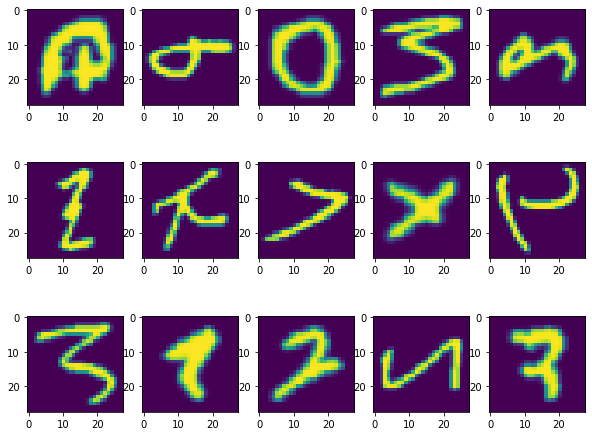

In [53]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

# Classification

In [54]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255


In [55]:

train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [56]:
import tensorflow as tf
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [57]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [58]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1
        )


data_generator.fit(train_x)

## Building the Keras CNN model

In [59]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Activation, Dropout, Dense, MaxPooling2D, Conv2D, Flatten
from keras.initializers import he_uniform, glorot_uniform
from keras.activations import relu
from keras.constraints import maxnorm

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

## Setting all random variables to a single seed for reproducibility

In [39]:
import os
import random
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['PYTHONHASHSEED'] = str(157)
random.seed(157)
np.random.seed(157)
tf.compat.v1.set_random_seed(157)
from tensorflow.python.keras import backend as k
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                        inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
k.set_session(sess)

## Training the network

In [60]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [62]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.8287
Epoch 1: val_accuracy improved from -inf to 0.87472, saving model to Best_points.h5
2220/2220 [==============================] - 115s 52ms/step - loss: 0.5479 - accuracy: 0.8287 - val_loss: 0.3721 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.9086
Epoch 2: val_accuracy improved from 0.87472 to 0.89499, saving model to Best_points.h5
2220/2220 [==============================] - 114s 51ms/step - loss: 0.2805 - accuracy: 0.9086 - val_loss: 0.3251 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 3/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9272
Epoch 3: val_accuracy did not improve from 0.89499
2220/2220 [==============================] - 103s 47ms/step - loss: 0.2236 - accuracy: 0.9271 - val_loss: 0.3474 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 4/10
2220/2220 [===============

## The final prediction and submission

Text(0, 0.5, 'Accuray')

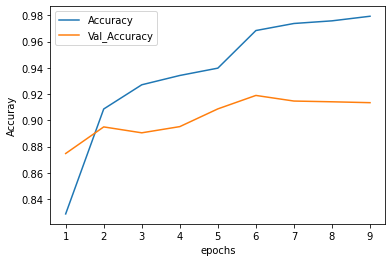

In [63]:
import seaborn as sns
q = len(history.history['accuracy'])
plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')